In [3]:
import math
import numpy as np
import random
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'numpy'

Lets Define $l_1$ and $l_2$ Norm. \
$$\begin{equation} 
l_1(\textbf{v}) = \sum_{i=1}^N |v_i|
\end{equation} 
$$
$$
l_2(\textbf{v}) = \sqrt{\sum_{i=1}^N |v_i|^2}
$$
Generally $l_k$ norm of a vector is defined by,
$$
l_k(v) = (|v_1|^k + |v_2|^k + ..... + | v_k | ^k)^{\frac{1}{k}}
$$

In [2]:
def l1Norm(x):
    return sum(x)
    
def l2Norm(x):
    n = len(x)
    total_sum = sum(list(map(lambda _list:_list * _list, x)))
    return math.sqrt(total_sum)

def lkNorm(vector,k):
    total_sum = sum(list(map(lambda _list: abs(_list) ** k,vector)))
    return total_sum ** (1/k)
    

In [3]:
vector = random.sample(range(1,10),3)
print(vector)
print("l1",l1Norm(vector))
print("l2",l2Norm(vector))
print("lK",lkNorm(vector,3))

[9, 5, 7]
l1 21
l2 12.449899597988733
lK 10.617722813909669


In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
#fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

#load the data
fetch_housing_data()
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#Lets get a info of this dataset
'''
info will provide the number of columns, their names, counts, null values and datatype

'''
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#we have given an object. Lets see its info
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


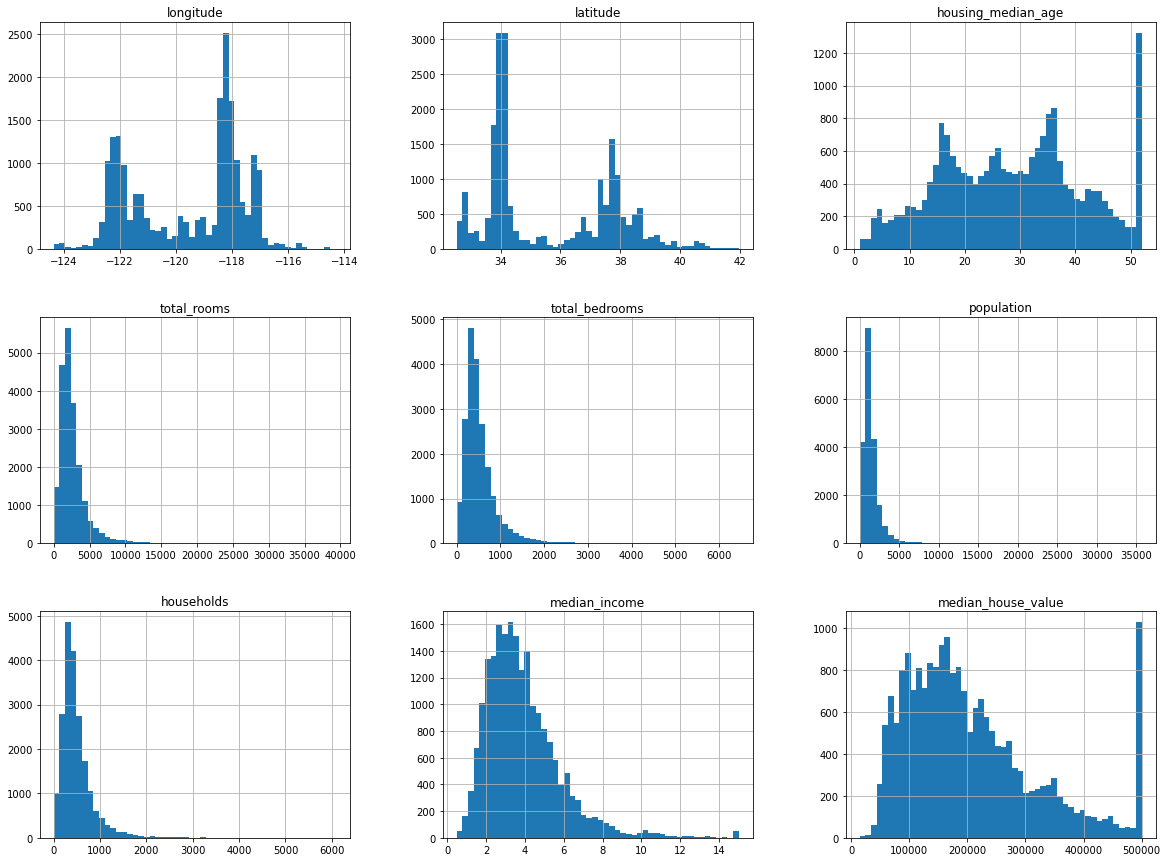

In [9]:
#Lets plot this data
%matplotlib inline
housing.hist(bins = 50, figsize=(20,15))
plt.show()

##### Creating test Set

In [10]:
# train_set,test_set = train_test_split(housing,test_size=0.3,random_state=42)


In [11]:
#here np.inf is used to create a class from 6 - infinity
housing["income_cat"] = pd.cut(housing.median_income,[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

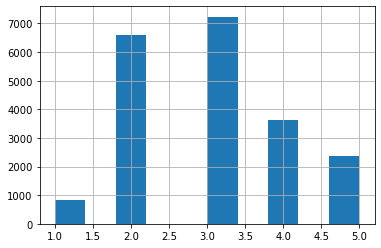

<AxesSubplot:>

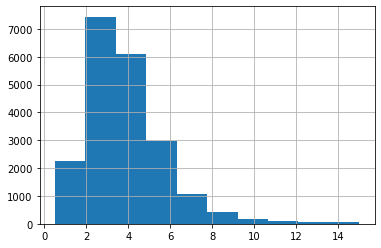

In [12]:
housing.income_cat.hist()
plt.show()
housing.median_income.hist()


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_inx, test_idx in split.split(housing,housing.income_cat):
    print(train_inx,test_idx)
    strat_train_set = housing.loc[train_inx]
    strat_test_set = housing.loc[test_idx]

[ 8577  5960  4753 ... 15591  5676  7730] [17966 17037  7313 ...  8136 15200 13586]


In [24]:
strat_test_set.income_cat.value_counts()

3    2171
2    1974
4    1092
5     708
1     247
Name: income_cat, dtype: int64

In [25]:
strat_train_set.income_cat.value_counts()

3    5065
2    4607
4    2547
5    1654
1     575
Name: income_cat, dtype: int64

In [26]:
housing.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [27]:
strat_train_set.drop("income_cat",axis = 1,inplace=True)
strat_test_set.drop("income_cat",axis = 1,inplace=True)
#Important to note here is that the axis = 0, deletes the row and, axis = 1 deletes the column.

In [28]:
'''
So far we downloaded the data. Looked into its histogram, figured one attribute might be the
most important one. So, categorized it, using pandas cut method. Once we have categorized,
we did stratified sampling and get the train and test dataset.
'''

'\nSo far we downloaded the data. Looked into its histogram, figured one attribute might be the\nmost important one. So, categorized it, using pandas cut method. Once we have categorized,\nwe did stratified sampling and get the train and test dataset.\n'

### Visualize the data

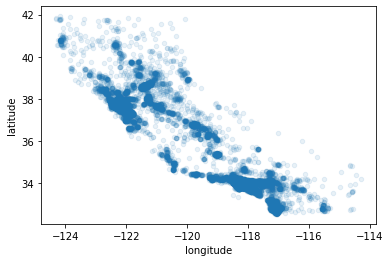

In [36]:
'''
It is very important to left the test set untouched and training set to be copied. we might 
chage it during visualization.
'''
housing = strat_train_set.copy()
#Scatter plot to view two attributes
housing.plot(kind="scatter",x = 'longitude',y = 'latitude',alpha = 0.1)
plt.show()

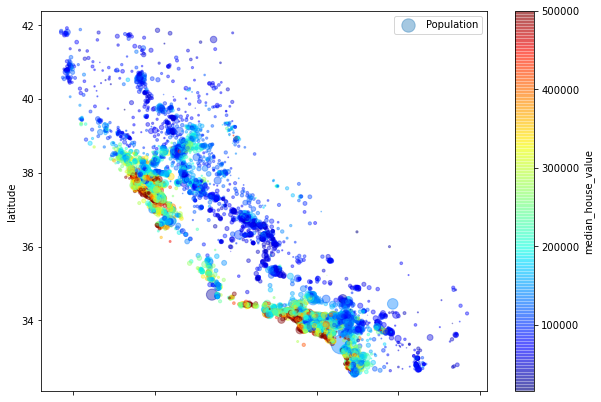

In [53]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude",alpha = 0.4,
            s = housing.population/100,label = "Population",
            figsize = (10,7), c = 'median_house_value',cmap = plt.get_cmap("jet"),
            colorbar = True,)
plt.legend()
plt.show()

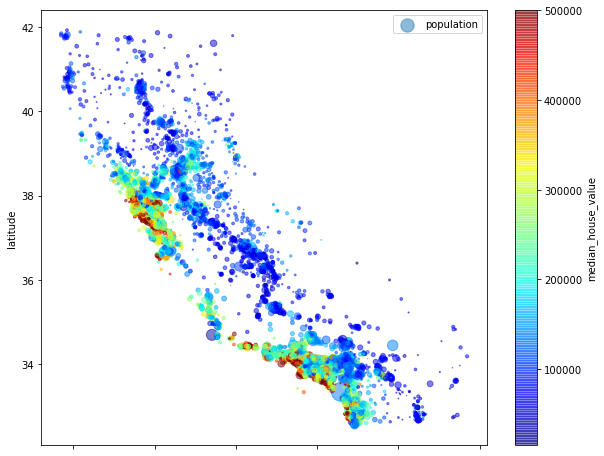

In [63]:
#lets try again to generate a population density in geographical area, based on popn 
#and colored by median_house value
housing.plot(kind = "scatter",x = 'longitude', y = "latitude",alpha = 0.5,
            s = housing.population/100,c = "median_house_value",
            label = "population",colorbar = True,cmap = plt.get_cmap("jet"),figsize = (10,8) )
plt.legend()
plt.show()

In [64]:
#Calculating the correlation matrix
corr_mat = housing.corr()


In [67]:
corr_mat.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

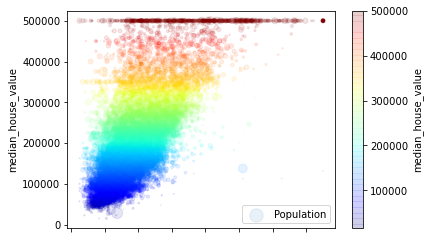

In [78]:
housing.plot(kind = 'scatter', x= "median_income", y = "median_house_value",
            alpha = 0.1, s = housing.population/100,
            c = 'median_house_value',
            cmap = plt.get_cmap("jet"),colorbar = True,label = "Population")
plt.legend()